# HW10

## alireza darvishi 96109674

### 3.3:

loading libraries and declaring Variables

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()

(a) cp.norm( [ x + 2 * y , x  -  y] ) == 0 <br>
(b) square ( square ( x + y ) ) <= x - y <br>
(c) 1/x  +  1/y <= 1 ; x >= 0 ; y >= 0 <br>
(d) norm( [ max( x , 1 ) , max ( y , 2 ) ] ) <= 3 * x + y<br>
(e) x * y >= 1 ; x >= 0 ; y >= 0<br>
(f) ( x + y )^2/sqrt(y) <= x - y + 5<br>
(g) x^3 + y^3 <= 1 ; x >= 0 ; y >= 0<br>
(h) x + z <= 1 + sqrt( x * y - z^2 ) ; x >= 0 ; y >= 0<br>

a)<br>
first we introduce a new variable t with help from np array<br>
then we set inequality of norm( t ) $\leq$ 0 because setting norm( t ) == 0 is not dcp and left hand is not affien but norm ( t ) $\geq$ holds already 

In [2]:
t=x*[1,1]+y*[2,-1]
constrain  = (cp.norm(x) <= 0)
print(constrain.is_dcp())
prob = cp.Problem(cp.Minimize(x),[constrain])
print(prob.solve())

True
-4.841433171885098e-10


b)<br>
replace square of square with power function

In [3]:
constrain  = (cp.power((x+y),4) <= x-y)
print(constrain.is_dcp())
prob = cp.Problem(cp.Minimize(x),[constrain])
print(prob.solve())

True
-0.23623519704504156


c)<br>
declare $2 \times 1$ vector t with x and y in each <br>
replace 1/x + 1/y with harmonic_mean function

In [4]:
t=x*[1,0]+y*[0,1]
constraints = [cp.harmonic_mean(t)>=2, x >= 0, y >= 0]
print(constraints[0].is_dcp())
prob = cp.Problem(cp.Minimize(x),constraints)
print(prob.solve())

True
1.0004149249896446


d)<br>
t = max ( 1, x ) so 1<=t and x<=t<br>
u = max ( y, 2 ) so y<=u and 2<=u <br>
finally v=[u,t] and norm(c)<= 3*x+y

In [5]:
t=cp.Variable()
u=cp.Variable()
v=t*[1,0]+u*[0,1]
constraints = [1<=t , x<=t , y <= u , 2 <= u , cp.norm(v)<=3*x+y]
prob = cp.Problem(cp.Minimize(y),constraints)
print(prob.solve())

-inf


e)<br>
x>=1/y

In [6]:
constraints = [x>=pow(y,-1),x>=0 , y>= 0]
prob = cp.Problem(cp.Minimize(x),constraints)
print(prob.solve())

0.00033978381252083774


f)

In [7]:
t=(x+y)
u=cp.sqrt(y)
v=cp.quad_over_lin(t,u)
constraints = [v<=x-y+5]
prob = cp.Problem(cp.Minimize(x),constraints)
print(prob.solve())

-2.6766326052203664


g)<br>
simply use p-norm with p=3

In [8]:
t=x*[1,0]+y*[0,1]
constraints = [cp.norm(t,3) <= 1, x >= 0, y >= 0]
prob = cp.Problem(cp.Minimize(x),constraints)
print(prob.solve())

-9.08091690198461e-12


h)<br>
t = $z^2$/y <br>
u = $\sqrt{y(x-t)}$ <br>
x+z <= 1+u<br>
and all expressions are dcp

In [9]:
t=cp.quad_over_lin(z,y)
u=cp.geo_mean( (x-t)*[1,0]+y*[0,1])
constraints=[x+z <= 1+u ]
prob = cp.Problem(cp.Minimize(x),constraints)
print(prob.solve())

1.508057932883562e-09


### 3.32 c

In [10]:
from satisfy_some_constraints_data import *

x = cp.Variable(n)
v = cp.Variable()
objective = cp.Minimize(c.T @ x)
constraints = [ v >=0 , cp.sum(cp.pos( v+ A @ x - b ))<= (m-k)*v ]
prob = cp.Problem( objective ,constraints )
print("optimal value is:",prob.solve())
print("lambda is:",1/v.value)
print("number of satisfied constraints:", sum( A @ x.value - b <= 10**-5))

idx = np.argsort(A @ x.value - b)[:k]
new_const = [ (A @ x - b)[idx[:-2]]<= 0 ]
new_prob = cp.Problem (objective , new_const )
print("new optimal value:",new_prob.solve())

optimal value is: -8.454464943573852
lambda is: 282.9846637002597
number of satisfied constraints: 66
new optimal value: -8.891600097480849


### 6.5 b

x estimation is: [ 0.48194427 -0.46569465  0.9364119   0.92966369]


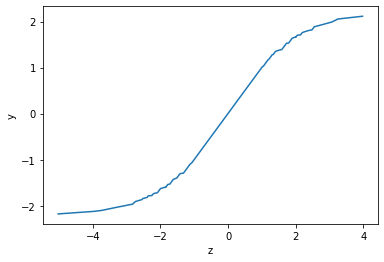

In [11]:
from nonlin_meas_data import *
x = cp.Variable(n)
z = cp.Variable(m)
objective = cp.Minimize( cp.norm( z - A @ x ) )
constraints = [ z[1:]-z[:-1] <= (y[1:]-y[:-1])/alpha , z[1:]-z[:-1] >= (y[1:]-y[:-1])/beta ]
prob = cp.Problem( objective ,constraints )
prob.solve()
print("x estimation is:", x.value)
plt.plot(z.value,y);
plt.ylabel("y");
plt.xlabel("z");